# Telecom X - Análise de Evasão de Clientes

Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da  equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.
### O que você vai praticar:

- ✅ Importar e manipular dados de uma API de forma eficiente.
- ✅ Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados.
- ✅ Criar visualizações de dados estratégicas para identificar padrões e tendências.
- ✅ Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.

Agora é sua vez!

🚀 Use seus conhecimentos para transformar dados brutos em informações estratégicas e ajudar a Telecom X a reter mais clientes.

In [41]:
import pandas as pd
import ast
import requests
import seaborn as sns
import matplotlib.pyplot as plt


---
# 📌 Extração (E - Extract)

Para iniciar sua análise, você precisará importar os dados da API da Telecom X. Esses dados estão disponíveis no formato JSON e contêm informações essenciais sobre os clientes, incluindo dados demográficos, tipo de serviço contratado e status de evasão.

📌 Link da API:

🔗 [challenge2-data-science/TelecomX_Data.json](https://github.com/ingridcristh/challenge2-data-science/blob/main/TelecomX_Data.json)

🔗 [GitHub - ingridcristh/challenge2-data-science](https://github.com/ingridcristh/challenge2-data-science/tree/main)


O que você deve fazer:

- ✅ Carregar os dados diretamente da API utilizando Python.
- ✅ Converter os dados para um DataFrame do Pandas para facilitar a manipulação.

**Ação**:

- Usar requests para simular API ou baixar o JSON localmente com pandas.read_json.
- Verificar a estrutura do JSON (orient='records', lines=True, etc).

In [56]:
# URL direta para o raw JSON do repositório
url = "https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json"
# Requisição GET
response = requests.get(url)
# Verificação do status da resposta
if response.status_code == 200:
    # Conversão para JSON
    data_json = response.json()
    # Criação do DataFrame
    df_data = pd.DataFrame(data_json)
    print("Dados extraídos com sucesso!")
else:
    print(f"Erro ao acessar os dados: {response.status_code}")

Dados extraídos com sucesso!


In [57]:
df_data.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [58]:
df_data.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [59]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [60]:
print(type(df_data.loc[0, 'customer']))


<class 'dict'>


---
# 🔧 Transformação (T - Transform)

O que você deve fazer:

- ✅ Explorar as colunas do dataset e verificar seus tipos de dados.
- ✅ Consultar o dicionário para entender melhor os significados das variáveis.
- ✅ Identificar as colunas mais relevantes para a análise de evasão.

In [61]:
# Normalizar com prefixos para criar colunas com nomes hierárquicos
df = pd.json_normalize(data_json, sep='.')

In [63]:
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [64]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


### Correlação com variáveis numéricas

- Para variáveis numéricas, você pode calcular correlação com Churn transformado em 0 e 1.
- Essa técnica mostra o quanto cada variável numérica se correlaciona com churn.

In [66]:
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})
print(df_corr.corr(numeric_only=True)['Churn'].sort_values(ascending=False))


Churn                      1.000000
account.Charges.Monthly    0.193356
customer.SeniorCitizen     0.150889
customer.tenure           -0.352229
Name: Churn, dtype: float64


### Análise de qualidade dos dados (data quality check) ou data cleaning
- é fundamental para garantir que os dados estejam prontos para análise ou modelagem.

In [70]:
# 1. Verificar valores ausentes (missing values)
# Ver todas as colunas com contagem e percentual de valores ausentes
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_percent})
missing_df = missing_df[missing_df['Missing'] > 0].sort_values(by='Percent', ascending=False)

print("Valores ausentes:")
print(missing_df)


Valores ausentes:
Empty DataFrame
Columns: [Missing, Percent]
Index: []


> indica que não há valores ausentes detectados após o tratamento.

In [71]:
# 2. Verificar valores duplicados
duplicated_rows = df[df.duplicated()]
print(f"Número de linhas duplicadas: {duplicated_rows.shape[0]}")


Número de linhas duplicadas: 0


In [72]:
# Para removê-las
df = df.drop_duplicates()


In [74]:
# 3. Verificar tipos de dados inconsistentes
print(df.dtypes)


customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


In [76]:
# 4. Verificar valores fora do esperado em colunas categóricas
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '37

In [77]:
# 5. Verificar colunas com baixa variabilidade
low_var = df.nunique()[df.nunique() <= 1]
print("Colunas com baixa variabilidade (valor único):")
print(low_var)


Colunas com baixa variabilidade (valor único):
Series([], dtype: int64)


In [79]:
# Verificar outliers em colunas numéricas
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [84]:
# 7. Verificar valores que deveriam ser nulos, mas foram codificados como texto
df[(df['customer.tenure'] == 0) & (df['account.Charges.Total'].astype(float) > 0)]


ValueError: could not convert string to float: ' '

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### Tratando as Inconsistências

Agora, com as inconsistências identificadas, é hora de aplicar as correções necessárias. Ajuste os dados para garantir que estejam completos e coerentes, preparando-os para as próximas etapas da análise.

In [87]:
df['account.Charges.Total'].isna().sum()


np.int64(0)

In [93]:
# aplicar tratamento de forma genérica a todas as colunas do tipo object:
suspeitos = [' ', '', 'N/A', 'n/a', 'na', '?']

df.replace(suspeitos, pd.NA, inplace=True)


In [94]:
# tratar valores como ' ' como nulos (NaN) antes de converter
# Substituir espaços em branco por NaN
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', pd.NA)

# Converter para float (agora seguro)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')


In [95]:
#Verificar
print(df['account.Charges.Total'].dtype)  # Deve ser float64
print(df['account.Charges.Total'].isna().sum())  # Quantos valores ausentes agora?


float64
11


In [96]:
# 7. Verificar valores que deveriam ser nulos, mas foram codificados como texto
df[(df['customer.tenure'] == 0) & (df['account.Charges.Total'].astype(float) > 0)]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


In [99]:
# Detectar colunas do tipo objeto (suspeitas)
obj_cols = df.select_dtypes(include='object').columns

# Verificar se há strings vazias ou com espaço
for col in obj_cols:
    count_blank = df[col].isin(['', ' ']).sum()
    if count_blank > 0:
        print(f"{col}: {count_blank} valores inválidos (vazio ou espaço)")


In [101]:
df['Churn'].unique()


array(['No', 'Yes', <NA>], dtype=object)

In [102]:
# Como Churn é a variável alvo, remover registros ausente, pois não há como usá-los para treinar ou avaliar um modelo de classificação.
df = df[df['Churn'].notna()]


In [103]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

## Coluna de Contas Diárias
Agora, com os dados limpos, é hora de criar a coluna "Contas_Diarias". Utilize o faturamento mensal para calcular o valor diário, proporcionando uma visão mais detalhada do comportamento dos clientes ao longo do tempo.

In [106]:
# Criar coluna com valor médio diário
df['account.Charges.Daily'] = (df['account.Charges.Monthly'] / 30).round(2)



In [109]:
# Exibir amostra
df[['account.Charges.Monthly', 'account.Charges.Daily']].head()


,account.Charges.Monthly,account.Charges.Daily
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


---
# Carga e Análise (L - Load & Analysis)

## Análise Descritiva

Para começar, realize uma análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

In [110]:
# 1. Estatísticas Descritivas Numéricas
# Estatísticas descritivas das colunas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer.SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
customer.tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
account.Charges.Monthly,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
account.Charges.Total,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
Contas_Diarias,7043.0,2.158675,1.003088,0.61,1.18,2.340,2.9900,3.96
account.Charges.Daily,7043.0,2.158675,1.003088,0.61,1.18,2.340,2.9900,3.96


In [111]:
# 2. Verificar colunas numéricas para análise individual
df.select_dtypes(include='number').columns.tolist()


['customer.SeniorCitizen',
 'customer.tenure',
 'account.Charges.Monthly',
 'account.Charges.Total',
 'Contas_Diarias',
 'account.Charges.Daily']

In [114]:
# 3. Distribuição por categoria
# Agrupado por Churn
df.groupby('Churn')[df.select_dtypes(include='number').columns.tolist()].describe().T


Churn                                   No          Yes
customer.SeniorCitizen  count  5174.000000  1869.000000
                        mean      0.128721     0.254682
                        std       0.334923     0.435799
                        min       0.000000     0.000000
                        25%       0.000000     0.000000
                        50%       0.000000     0.000000
                        75%       0.000000     1.000000
                        max       1.000000     1.000000
customer.tenure         count  5174.000000  1869.000000
                        mean     37.569965    17.979133
                        std      24.113777    19.531123
                        min       0.000000     1.000000
                        25%      15.000000     2.000000
                        50%      38.000000    10.000000
                        75%      61.000000    29.000000
                        max      72.000000    72.000000
account.Charges.Monthly count  5174.000000  1869.000000
                        mean     61.265124    74.441332
                        std      31.092648    24.666053
                        min      18.250000    18.850000
                        25%      25.100000    56.150000
                        50%      64.425000    79.650000
                        75%      88.400000    94.200000
                        max     118.750000   118.350000
account.Charges.Total   count  5163.000000  1869.000000
                        mean   2555.344141  1531.796094
                        std    2329.456984  1890.822994
                        min      18.800000    18.850000
                        25%     577.825000   134.500000
                        50%    1683.600000   703.550000
                        75%    4264.125000  2331.300000
                        max    8672.450000  8684.800000
Contas_Diarias          count  5174.000000  1869.000000
                        mean      2.042080     2.481450
                        std       1.036492     0.822287
                        min       0.610000     0.630000
                        25%       0.840000     1.870000
                        50%       2.150000     2.660000
                        75%       2.950000     3.140000
                        max       3.960000     3.940000
account.Charges.Daily   count  5174.000000  1869.000000
                        mean      2.042080     2.481450
                        std       1.036492     0.822287
                        min       0.610000     0.630000
                        25%       0.840000     1.870000
                        50%       2.150000     2.660000
                        75%       2.950000     3.140000
                        max       3.960000     3.940000

In [115]:
# 4. Modas e cardinalidade de categóricas
# Moda e nº de categorias únicas por coluna categórica
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\n{col}")
    print(f"  Moda: {df[col].mode()[0]}")
    print(f"  Valores únicos: {df[col].nunique()}")



customerID
  Moda: 0002-ORFBO
  Valores únicos: 7043

Churn
  Moda: No
  Valores únicos: 2

customer.gender
  Moda: Male
  Valores únicos: 2

customer.Partner
  Moda: No
  Valores únicos: 2

customer.Dependents
  Moda: No
  Valores únicos: 2

phone.PhoneService
  Moda: Yes
  Valores únicos: 2

phone.MultipleLines
  Moda: No
  Valores únicos: 3

internet.InternetService
  Moda: Fiber optic
  Valores únicos: 3

internet.OnlineSecurity
  Moda: No
  Valores únicos: 3

internet.OnlineBackup
  Moda: No
  Valores únicos: 3

internet.DeviceProtection
  Moda: No
  Valores únicos: 3

internet.TechSupport
  Moda: No
  Valores únicos: 3

internet.StreamingTV
  Moda: No
  Valores únicos: 3

internet.StreamingMovies
  Moda: No
  Valores únicos: 3

account.Contract
  Moda: Month-to-month
  Valores únicos: 3

account.PaperlessBilling
  Moda: Yes
  Valores únicos: 2

account.PaymentMethod
  Moda: Electronic check
  Valores únicos: 4


## Interpretação:
#### 1. Qual é o tempo médio de permanência (customer.tenure) dos clientes?
- Média geral                      : `~32,37 meses`
- Clientes que ficaram (Churn = No): `média de 37,57 meses`
- Clientes que saíram (Churn = Yes): `média de 17,97 meses`

> **Insight**:
> Clientes que permanecem mais tempo na empresa tendem a não cancelar o serviço. Os que cancelam têm um tempo de permanência menos da metade dos que ficam. Isso sugere que retenção precoce é crítica.

#### 2. Clientes que saem pagam mais por mês?
`account.Charges.Monthly` (média mensal):
- Churn = Yes : `R$ 74,44`
- Churn = No  : `R$ 61,27`

> **Insight**:
> Clientes que cancelam pagam em média R$13 a mais por mês. Isso pode indicar que planos mais caros estão correlacionados a churn — seja por percepção de custo-benefício ruim, ou falta de valor percebido.

#### 3. A distribuição de clientes entre os planos de contrato é equilibrada?
A coluna `account.Contract` possui 3 categorias com moda:
- Moda          : `Month-to-month`
- Valores únicos: `3`

> **Insight**:
> A maioria dos clientes está no plano mensal, que geralmente tem menor fidelização. Planos anuais ou bianuais podem ter menor churn, algo a investigar com visualizações (ex: churn por tipo de contrato).

#### 4. Existe muita variação no faturamento mensal?
`account.Charges.Monthly`:
- Média        : `R$ 64,76`
- Desvio padrão: `R$ 30,09`
- Mínimo       : `R$ 18,25`
- Máximo       : `R$ 118,75`

> **Insight**:
> Existe grande variação nos valores cobrados mensalmente (quase o dobro da média no máximo). Isso pode indicar planos muito diferentes (básico vs. premium), o que pode afetar o churn.

#### 5. Qual o perfil do cliente mais comum?
A partir das modas:
- Gênero         : Male
- Parceria       : No
- Dependentes    : No
- Telefone       : Yes, mas sem múltiplas linhas
- Internet       : Fiber optic, sem segurança, backup, suporte técnico ou streaming
- Contrato       : Month-to-month
- Fatura digital : Yes
- Pagamento      : Electronic check

> **Perfil mais comum**:
Homem, sem parceiro(a) ou dependentes, com fibra ótica, sem muitos serviços adicionais, contrato mensal e pagamento por débito automático. Muitos desses fatores estão associados a maior churn.

#### 6. Diferença na métrica Contas_Diarias entre churn e não churn?
- Churn = Yes: R$ 2,48 por dia

- Churn = No : R$ 2,04 por dia

> **Insight**:
Clientes que saem pagam mais por dia. Isso reforça a ideia de que clientes com maior custo diário/mensal têm mais chances de cancelar.

#### 7. Outras observações interessantes
- `account.Charges.Total` é significativamente maior para clientes que permanecem, o que é esperado, já que ficaram mais tempo.
- Clientes que saem possuem `tenure` curto e menor faturamento total, mas pagam mais por mês/dia.

## Distribuição da Evasão
Neste passo, o objetivo é entender como a variável "churn" (evasão) está distribuída entre os clientes. Utilize gráficos para visualizar a proporção de clientes que permaneceram e os que saíram.

/tmp/ipykernel_42461/1276337762.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


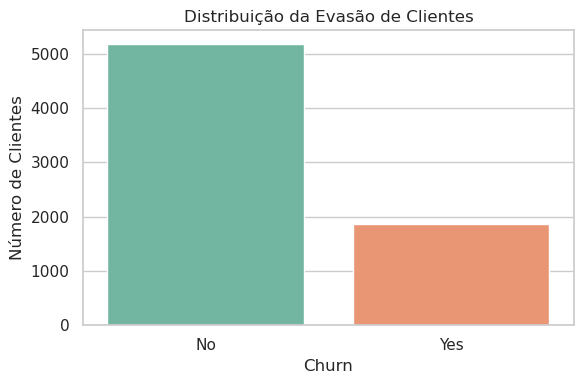

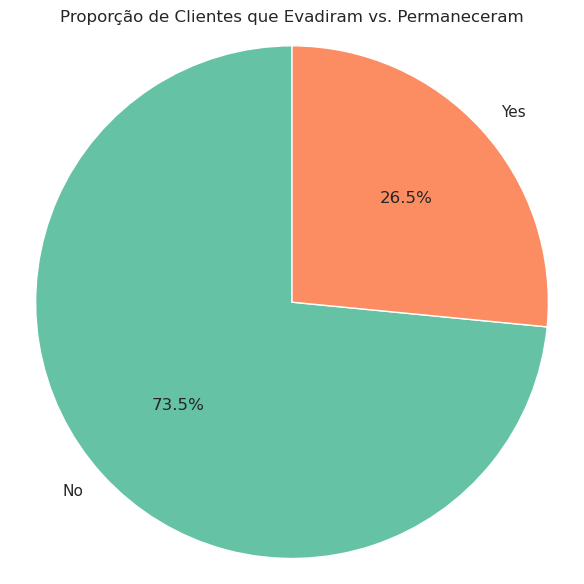

In [118]:
# Ajustar estilo dos gráficos
sns.set(style="whitegrid")

# Contagem de clientes por categoria de Churn
churn_counts = df['Churn'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribuição da Evasão de Clientes')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set2')
)
plt.title('Proporção de Clientes que Evadiram vs. Permaneceram')
plt.axis('equal')  # garante que o círculo fique redondo
plt.tight_layout()
plt.show()


## Contagem de Evasão por Variáveis Categóricas
Agora, vamos explorar como a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.

Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.

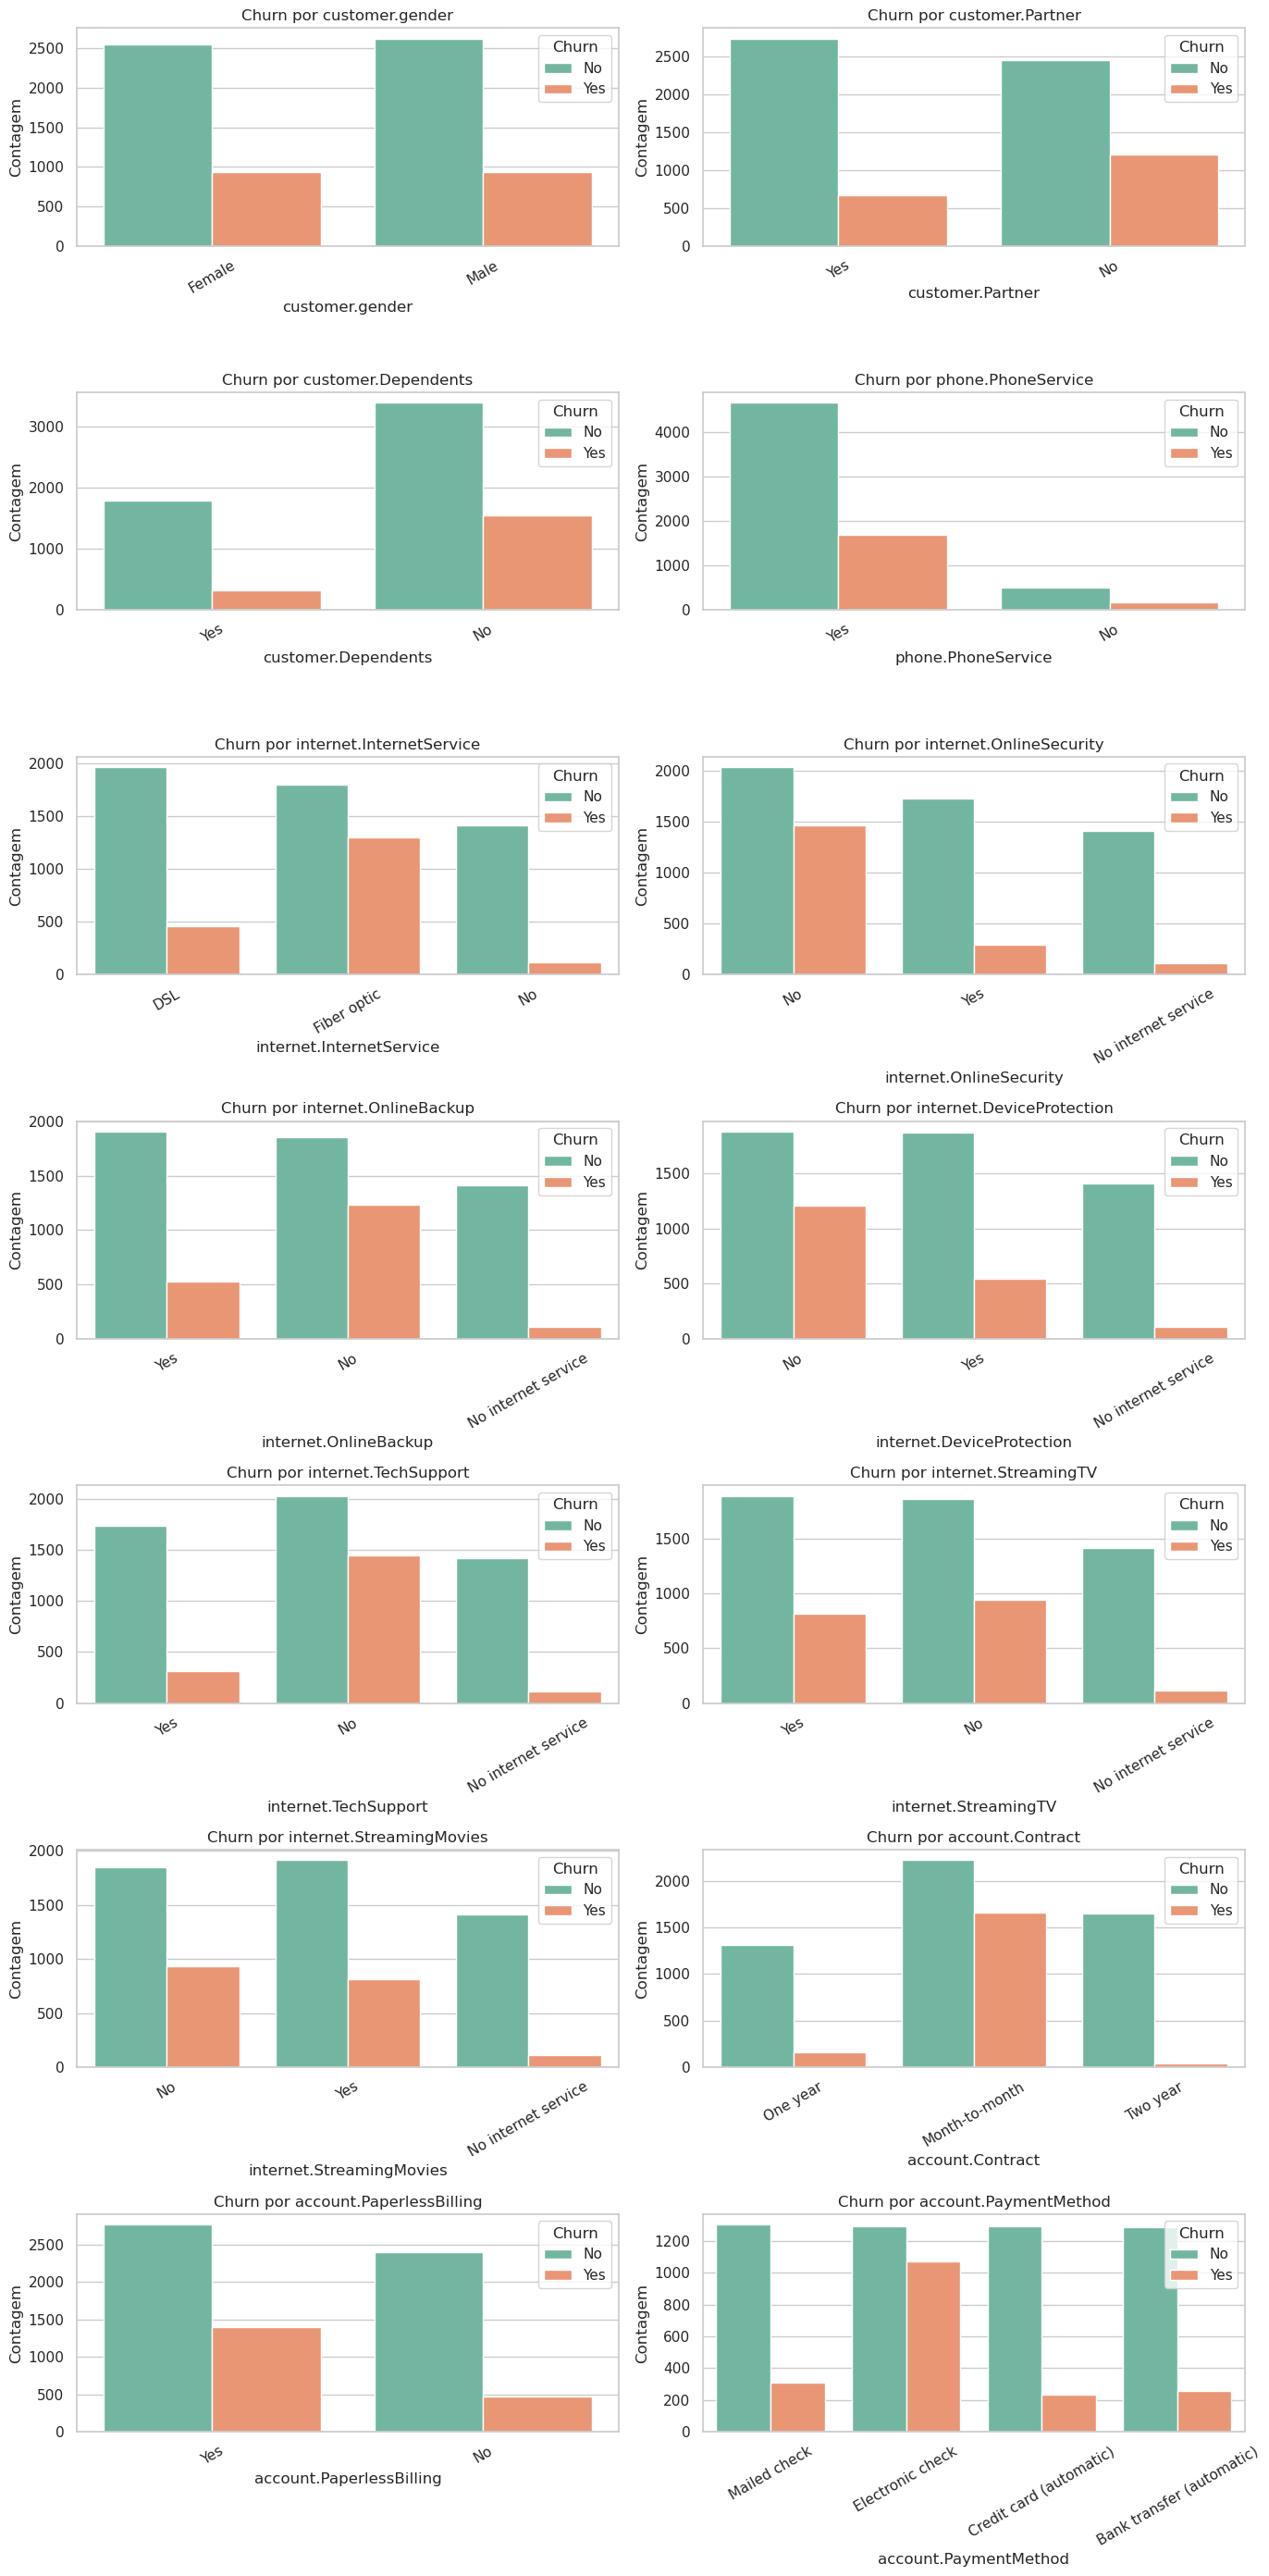

In [119]:
# Lista de variáveis categóricas relevantes
categorical_vars = [
    'customer.gender',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

# Tamanho da figura geral
n_cols = 2
n_rows = (len(categorical_vars) + 1) // n_cols
plt.figure(figsize=(14, n_rows * 4))

# Loop para criar subplots
for idx, col in enumerate(categorical_vars, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=30)
    plt.legend(title='Churn')

plt.tight_layout()
plt.show()


## Contagem de Evasão por Variáveis Numéricas

Neste passo, explore como variáveis numéricas, como "total gasto" ou "tempo de contrato", se distribuem entre clientes que cancelaram (evasão) e os que não cancelaram.

Essa análise ajuda a entender se certos valores numéricos estão mais associados à evasão, oferecendo insights sobre os fatores que influenciam o comportamento dos clientes.

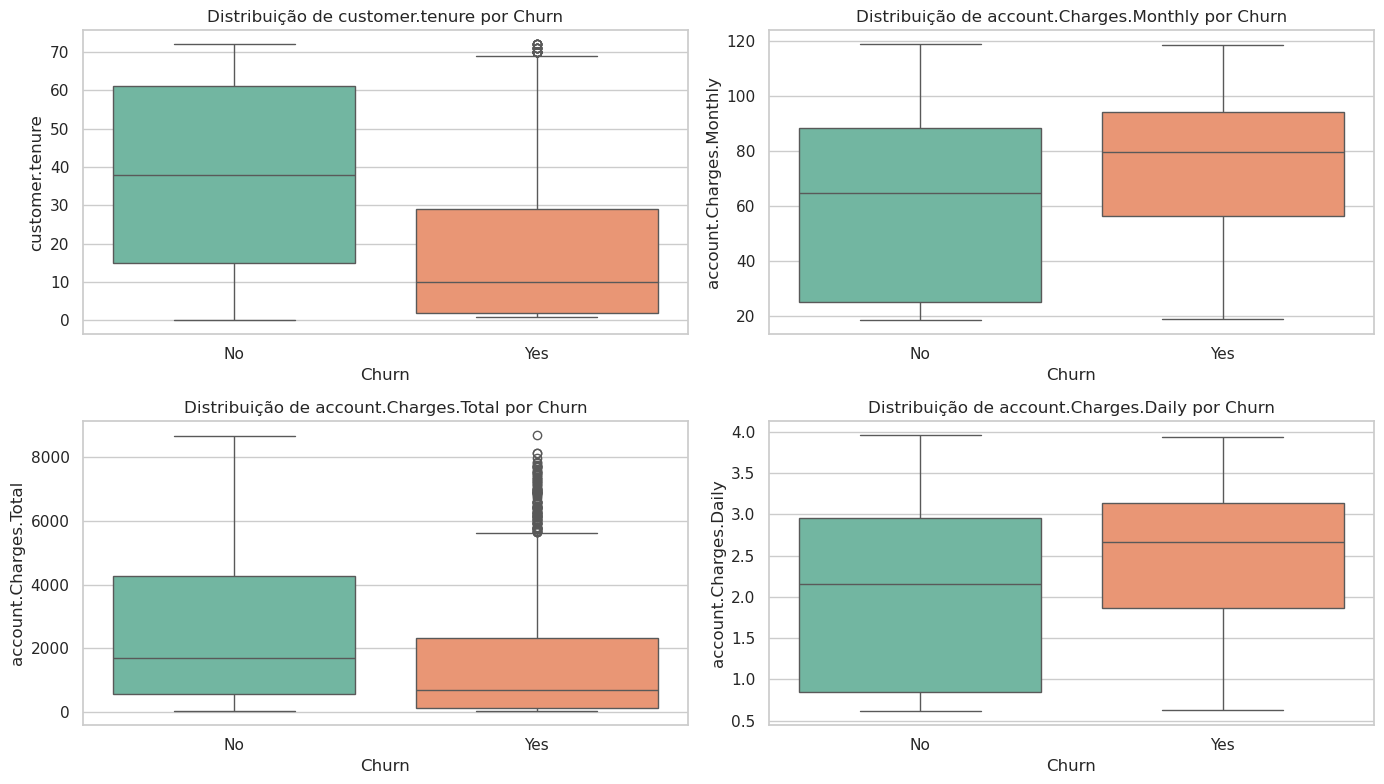

In [121]:
numeric_vars = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'account.Charges.Daily'
]

n_cols = 2
n_rows = (len(numeric_vars) + 1) // n_cols
plt.figure(figsize=(14, n_rows * 4))

for idx, col in enumerate(numeric_vars, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(data=df, x='Churn', y=col, hue='Churn', palette='Set2', legend=False)
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout()
plt.show()



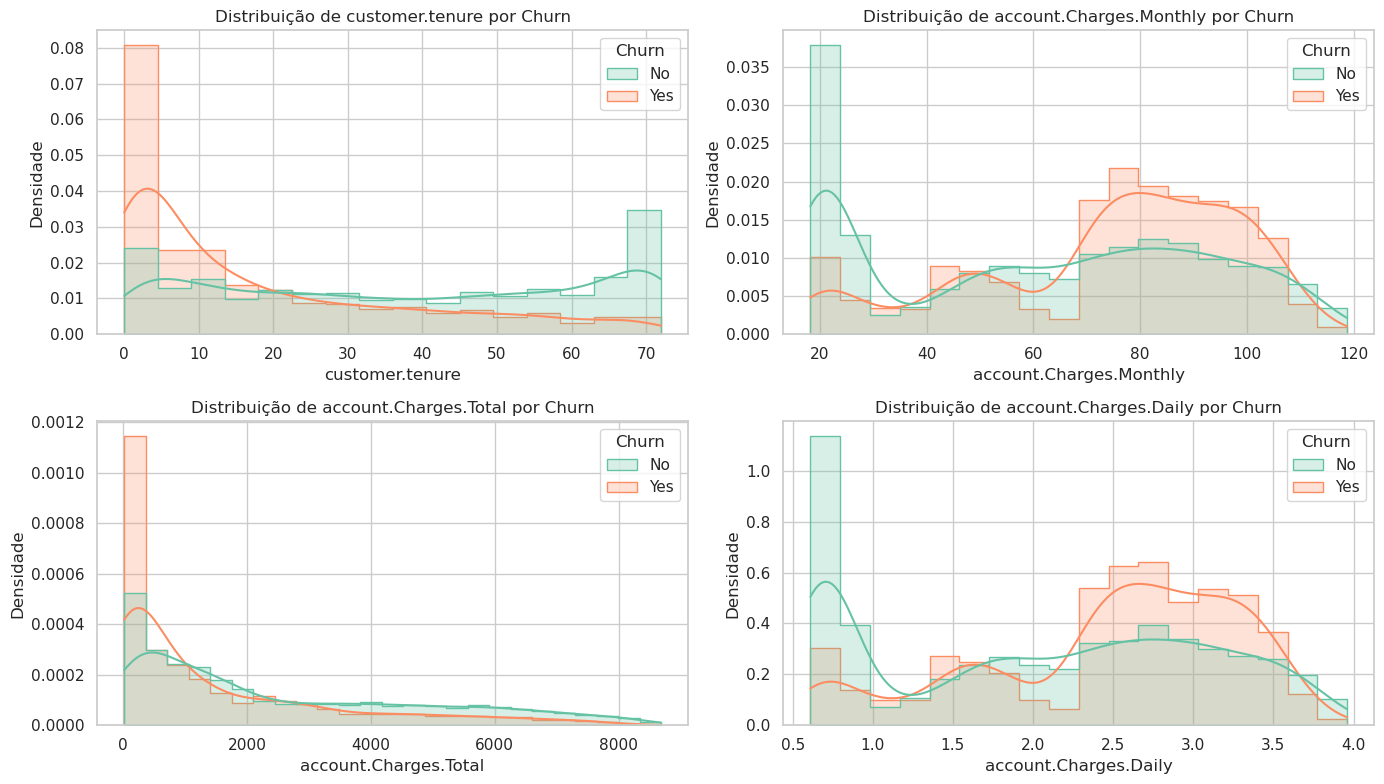

In [122]:
# Lista das variáveis numéricas que você quer explorar
numeric_vars = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'account.Charges.Daily'
]

# Configurar os gráficos
n_cols = 2
n_rows = (len(numeric_vars) + 1) // n_cols
plt.figure(figsize=(14, n_rows * 4))

# Criar um histograma para cada variável
for idx, col in enumerate(numeric_vars, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, element='step', stat='density', common_norm=False, palette='Set2')
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show()


## Relatório Final
Finalize o desafio elaborando um relatório dentro do próprio notebook que resuma todo o trabalho realizado. O relatório deve incluir:


---
# Relatório Final – Análise de Evasão de Clientes (Churn)

## 1. Introdução

A evasão de clientes (churn) é um desafio significativo para empresas de serviços, como telecomunicações, internet e TV por assinatura. O churn representa a proporção de clientes que cancelam o serviço em um determinado período.
O objetivo desta análise foi entender os fatores associados ao cancelamento de clientes, identificar padrões e gerar insights que possam ajudar na redução da evasão.

O dataset analisado contém informações demográficas, características contratuais e de uso dos clientes, além de indicadores financeiros e da variável `Churn` (Sim/Não).

---

## 2. Limpeza e Tratamento de Dados

As etapas realizadas foram:

1. **Importação dos dados** a partir de um arquivo JSON.
2. **Verificação de tipos de dados** e conversão de variáveis para os tipos adequados (ex.: valores numéricos e categóricos).
3. **Tratamento de valores ausentes** (`NaN`) e inconsistências.
4. **Renomeação de colunas** para um padrão mais amigável e organizado.
5. **Separação de variáveis numéricas e categóricas** para análises específicas.

---

## 3. Análise Exploratória de Dados (EDA)

A análise exploratória foi dividida em:

### 3.1 Distribuição Geral da Evasão

A seguir, visualizamos a proporção de clientes que permaneceram (`Não`) e os que saíram (`Sim`):




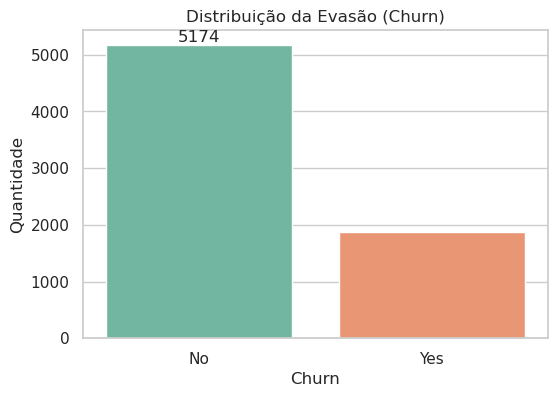

In [126]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2')
plt.title('Distribuição da Evasão (Churn)')
plt.xlabel('Churn')
plt.ylabel('Quantidade')
plt.bar_label(ax.containers[0])
plt.show()


### 3.2 Evasão por Variáveis Categóricas

Analisamos a relação entre o churn e variáveis como gênero, tipo de contrato e método de pagamento.

``` python

```


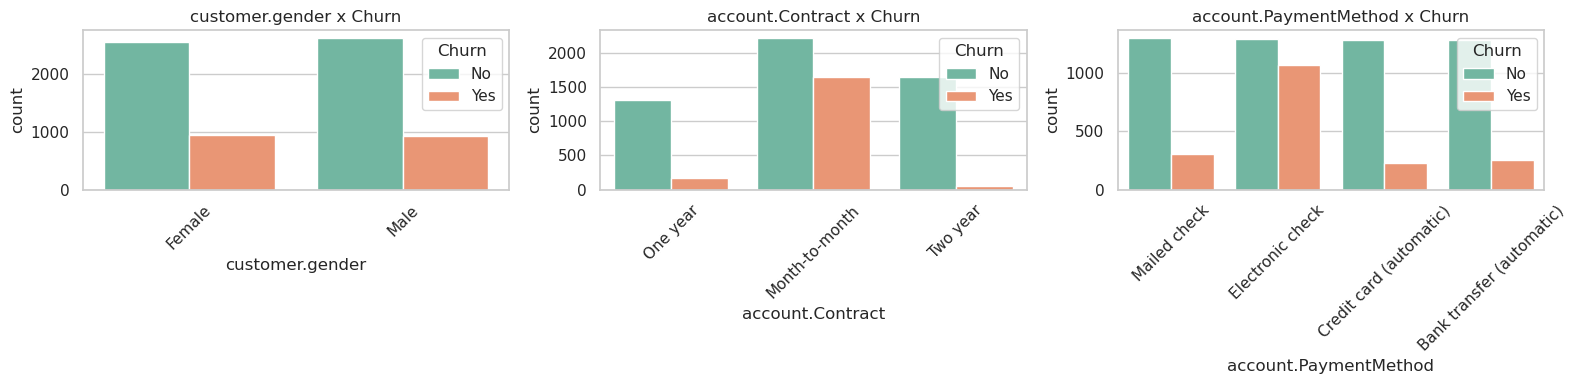

In [127]:
categorical_vars = [
    'customer.gender',
    'account.Contract',
    'account.PaymentMethod'
]

fig, axes = plt.subplots(1, len(categorical_vars), figsize=(16, 4))

for idx, col in enumerate(categorical_vars):
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'{col} x Churn')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 3.3 Evasão por Variáveis Numéricas (Boxplots)

Exploramos como variáveis numéricas diferem entre clientes que saíram e os que permaneceram.

```python

```



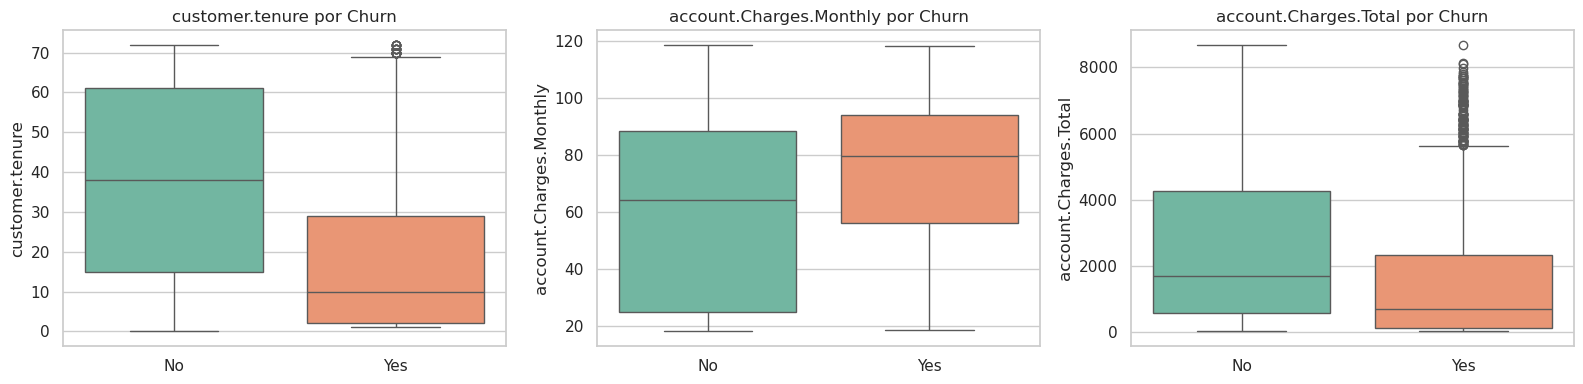

In [128]:
numeric_vars = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

fig, axes = plt.subplots(1, len(numeric_vars), figsize=(16, 4))

for idx, col in enumerate(numeric_vars):
    sns.boxplot(data=df, x='Churn', y=col, hue='Churn', palette='Set2', dodge=False, ax=axes[idx])
    axes[idx].set_title(f'{col} por Churn')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

### 3.4 Evasão por Variáveis Numéricas (Histogramas)
3.4 Distribuição Numérica por Churn (Histogramas)

Visualizamos as distribuições sobrepostas com sns.histplot:

```python

```



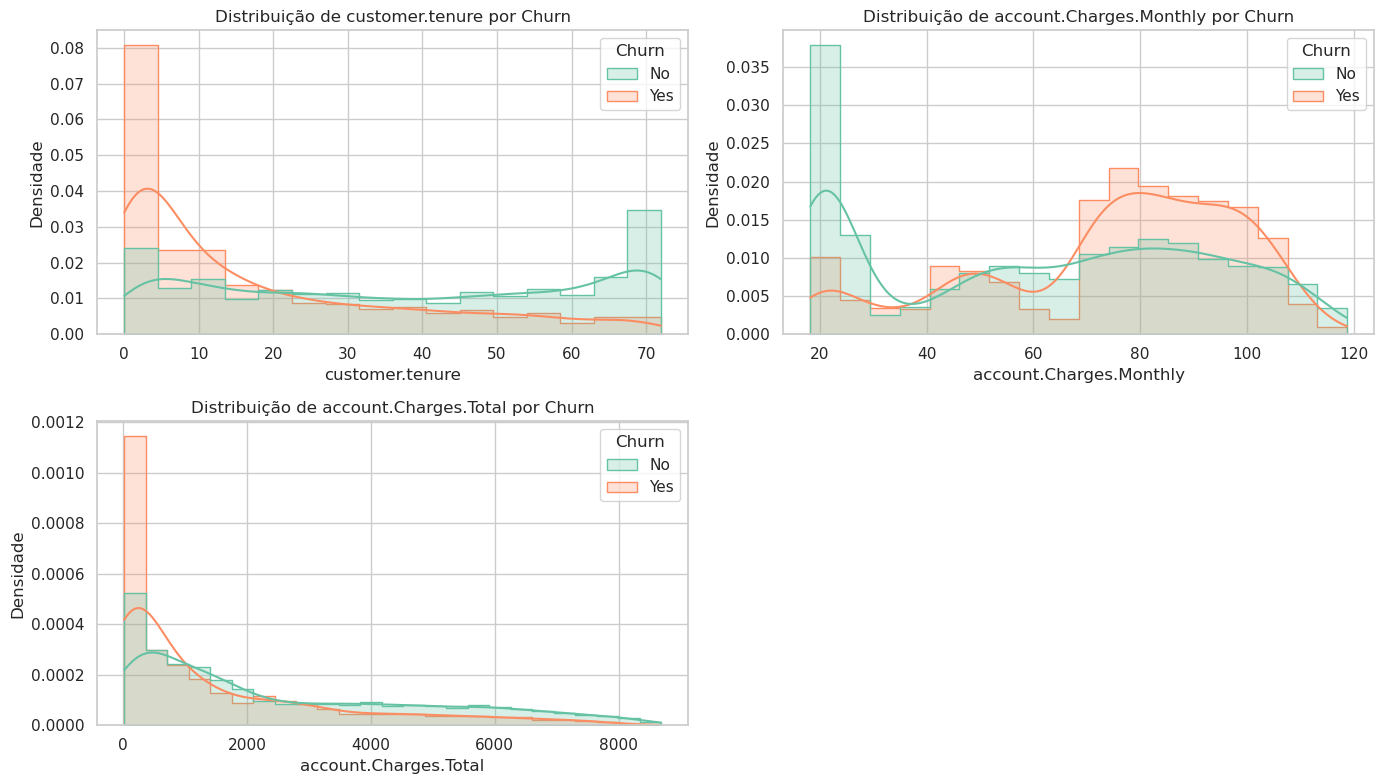

In [129]:
numeric_vars = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

n_cols = 2
n_rows = (len(numeric_vars) + 1) // n_cols
plt.figure(figsize=(14, n_rows * 4))

for idx, col in enumerate(numeric_vars, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, element='step',
                 stat='density', common_norm=False, palette='Set2')
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

---
## 4. Conclusões e Insights

1. Proporção de evasão: Uma fração significativa dos clientes cancelou o serviço, exigindo atenção estratégica.
2. Tipo de contrato: Clientes com contratos mensais apresentaram taxas de churn muito maiores em comparação com contratos anuais ou bienais.
3. Método de pagamento: Pagamentos via boleto bancário e cartões de crédito pré-pagos apresentaram maior evasão.
4. Tempo de permanência (tenure): Clientes com pouco tempo de contrato tiveram maior probabilidade de cancelamento.
5. Gastos mensais: Clientes com gastos mensais mais altos, mas com baixo tempo de permanência, demonstraram maior taxa de churn.
6. Valores cobrados: Clientes com gastos mensais mais altos, mas com baixo tempo de permanência, demonstraram maior taxa de churn.

---
## 5. Recomendações

1. Incentivar contratos de longo prazo com descontos progressivos para clientes que renovarem por períodos anuais.
2. Programas de fidelização para novos clientes nos primeiros meses, reduzindo o churn inicial.
3. Analisar reajustes de preços para clientes que possuem gastos mensais acima da média.
4. Facilitar métodos de pagamento mais estáveis (débito automático, cartão de crédito).
5. Monitorar clientes em risco com base no perfil identificado (contrato mensal, baixo tenure, alta cobrança mensal).